In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore all warning messages for cleaner notebook output
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the rental analysis dataset
data = pd.read_csv("final Rent_Analysis12.csv")

In [4]:
# Display the first 5 rows of the dataset
data.head()

,Property_title,rent,furnishing,carpet_area,facing,balcony,availability,bathrooms,floors,point_of_contact,BHK,rent_numeric,property_type,locality,floor_number,availability_type,carpet_area_sqft
0,2 BHK Flat for Rent in Kolte Patil Life Republ...,"₹23,006",Semi-Furnished,910 sqft,East,1.0,Immediately,2,17 out of 22,Contact Agent,2,23006.0,Flat,Hinjawadi,17,Immediate,910.0
1,"2 BHK Flat for Rent in Sinhgad Road, Pune","₹28,000",Semi-Furnished,800 sqft,East,1.0,Immediately,2,2 out of 5,Contact Agent,2,28000.0,Flat,Sinhgad Road,2,Immediate,800.0
2,"2 BHK Flat for Rent in Gera World of Joy, Khar...","₹36,000",Unfurnished,740 sqft,East,1.0,Immediately,2,5 out of 7,Contact Agent,2,36000.0,Flat,Kharadi,5,Immediate,740.0
3,"3 BHK Flat for Rent in Sacred Heart Town, Wano...","₹45,000",Semi-Furnished,NaN,East,3.0,From Feb '26,3,3 out of 7,Contact Agent,3,45000.0,Flat,Wanowrie,3,Future,NaN
4,"3 BHK Flat for Rent in Ganga Nebula, Viman Nag...","₹65,000",Furnished,1250 sqft,East,2.0,Immediately,3,4 out of 6,Contact Agent,3,65000.0,Flat,Viman Nagar,4,Immediate,1250.0


In [5]:
# Check the number of rows and columns in the dataset
data.shape 

(2970, 17)

In [6]:
# Get summary information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property_title     2970 non-null   object 
 1   rent               2970 non-null   object 
 2   furnishing         2970 non-null   object 
 3   carpet_area        2475 non-null   object 
 4   facing             2871 non-null   object 
 5   balcony            2880 non-null   float64
 6   availability       2970 non-null   object 
 7   bathrooms          2970 non-null   int64  
 8   floors             2970 non-null   object 
 9   point_of_contact   2970 non-null   object 
 10  BHK                2970 non-null   int64  
 11  rent_numeric       2970 non-null   float64
 12  property_type      2970 non-null   object 
 13  locality           2970 non-null   object 
 14  floor_number       2970 non-null   int64  
 15  availability_type  2970 non-null   object 
 16  carpet_area_sqft   2475 

#### Interpretation :
The dataset contains 2970 rental property listings with both numerical and categorical features related to rent,bhk, carpetarea, and location.

In [7]:
# checking missing values
data.isna().sum()

Property_title         0
rent                   0
furnishing             0
carpet_area          495
facing                99
balcony               90
availability           0
bathrooms              0
floors                 0
point_of_contact       0
BHK                    0
rent_numeric           0
property_type          0
locality               0
floor_number           0
availability_type      0
carpet_area_sqft     495
dtype: int64

In [8]:
# Drop columns that are not needed for the current analysis
data.drop(columns=['rent', 'carpet_area','availability','floors','point_of_contact'], inplace=True)


In [9]:
# Fill missing carpet area values with the median value for each BHK category
data['carpet_area_sqft'] = data.groupby('BHK')['carpet_area_sqft'].transform(
    lambda x: x.fillna(x.median())
)


In [10]:
# Impute missing 'facing' information with 'Unknown' to indicate no data
data['facing'] = data['facing'].fillna('Unknown')


In [11]:
# Fill missing 'balcony' values with the median number of balconies
data['balcony'] = data['balcony'].fillna(data['balcony'].median())


#### Interpretation:
Missing values in carpet area were imputed using the median carpet area for each BHK category to preserve realistic property sizes. This avoids bias caused by extreme values.

In [12]:
# Check the number of missing values in each column
data.isna().sum()

Property_title       0
furnishing           0
facing               0
balcony              0
bathrooms            0
BHK                  0
rent_numeric         0
property_type        0
locality             0
floor_number         0
availability_type    0
carpet_area_sqft     0
dtype: int64

In [13]:
# Rename columns for consistency and easier reference
data.rename(columns={
    'carpet_area_sqft': 'carpet_area',
    'floor_number': 'floor',
    'rent_numeric': 'rent',
    'BHK': 'bhk',
    'availability_type': "availability"
}, inplace=True)


In [14]:
# Verify dataset dimensions after renaming columns and handling missing values
data.shape

(2970, 12)

In [15]:
# Get the total number of values in the dataset after preprocessing
data.size

35640

In [16]:
data.head()

,Property_title,furnishing,facing,balcony,bathrooms,bhk,rent,property_type,locality,floor,availability,carpet_area
0,2 BHK Flat for Rent in Kolte Patil Life Republ...,Semi-Furnished,East,1.0,2,2,23006.0,Flat,Hinjawadi,17,Immediate,910.0
1,"2 BHK Flat for Rent in Sinhgad Road, Pune",Semi-Furnished,East,1.0,2,2,28000.0,Flat,Sinhgad Road,2,Immediate,800.0
2,"2 BHK Flat for Rent in Gera World of Joy, Khar...",Unfurnished,East,1.0,2,2,36000.0,Flat,Kharadi,5,Immediate,740.0
3,"3 BHK Flat for Rent in Sacred Heart Town, Wano...",Semi-Furnished,East,3.0,3,3,45000.0,Flat,Wanowrie,3,Future,1200.0
4,"3 BHK Flat for Rent in Ganga Nebula, Viman Nag...",Furnished,East,2.0,3,3,65000.0,Flat,Viman Nagar,4,Immediate,1250.0


#### Splitting the dataset into numerical and categorical

In [17]:
# Identify numerical columns for analysis
numerical_cols = data.select_dtypes(include=['int64', 'float64', 'Int64']).columns.tolist()

# Identify categorical columns for analysis
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the column types
print("Numerical Columns:", numerical_cols)
print("."*100)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['balcony', 'bathrooms', 'bhk', 'rent', 'floor', 'carpet_area']
....................................................................................................
Categorical Columns: ['Property_title', 'furnishing', 'facing', 'property_type', 'locality', 'availability']


#### Interpretation:
Features were classified into numerical and categorical variables to apply appropriate statistical and visualization techniques during EDA.

In [18]:
data.describe()

,balcony,bathrooms,bhk,rent,floor,carpet_area
count,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000
mean,1.987879,2.630303,2.630303,56271.412121,8.900000,1295.209091
std,0.730319,0.799560,0.752692,62753.924102,5.683386,847.791902
min,1.000000,1.000000,1.000000,21000.000000,1.000000,500.000000
25%,2.000000,2.000000,2.000000,28000.000000,5.000000,800.000000
50%,2.000000,2.000000,3.000000,36000.000000,7.000000,1060.000000
75%,2.000000,3.000000,3.000000,50000.000000,12.000000,1270.000000
max,4.000000,5.000000,4.000000,350000.000000,20.000000,4700.000000


#### Interpretation:
Rental prices show high variability, indicating the presence of both budget and premium properties in Pune’s rental market.

## Univariate Analysis

- Univariate analysis examines each feature independently to understand its distribution and characteristics.
- It helps analyze the shape, central tendency, and dispersion of data, and identify issues such as outliers, skewness, and missing values.
- Univariate analysis helps detect data issues such as outliers, skewness, and missing values, which may affect further analysis.

#### Shape of Data Distribution
- Data distributions can be normal, skewed (positive or negative), bimodal, or uniform. Understanding the shape helps in selecting appropriate statistical methods.

#### Dispersion
- Dispersion describes the spread of data and is measured using range, variance, standard deviation, and interquartile range (IQR). It helps identify variability and outliers.

### Distribution of Data

In [19]:
num_cols = [
    'rent',
    'carpet_area',
    'bhk',
    'bathrooms',
    'balcony'
]


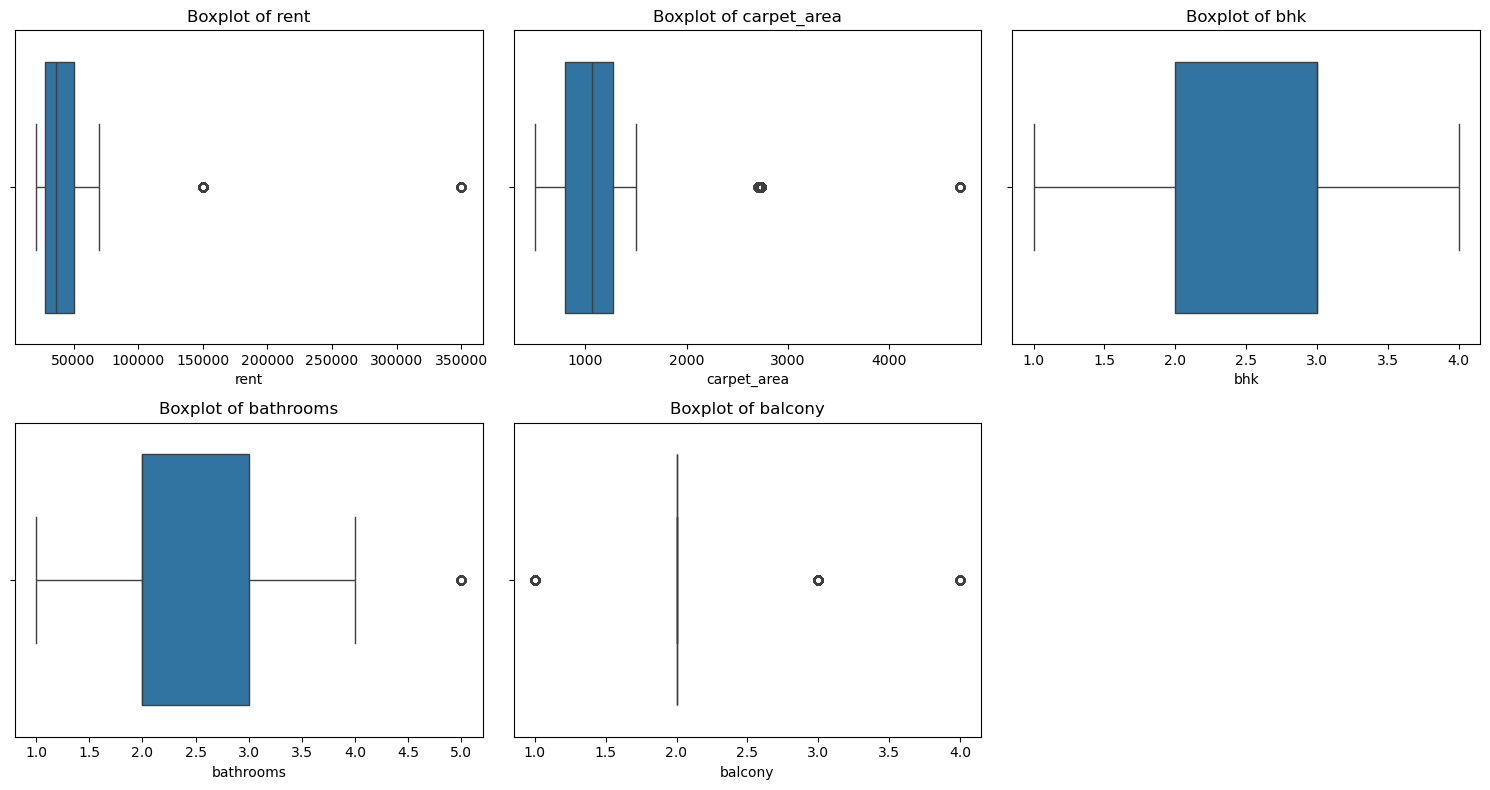

In [20]:
num_cols = ['rent', 'carpet_area', 'bhk', 'bathrooms', 'balcony']

plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


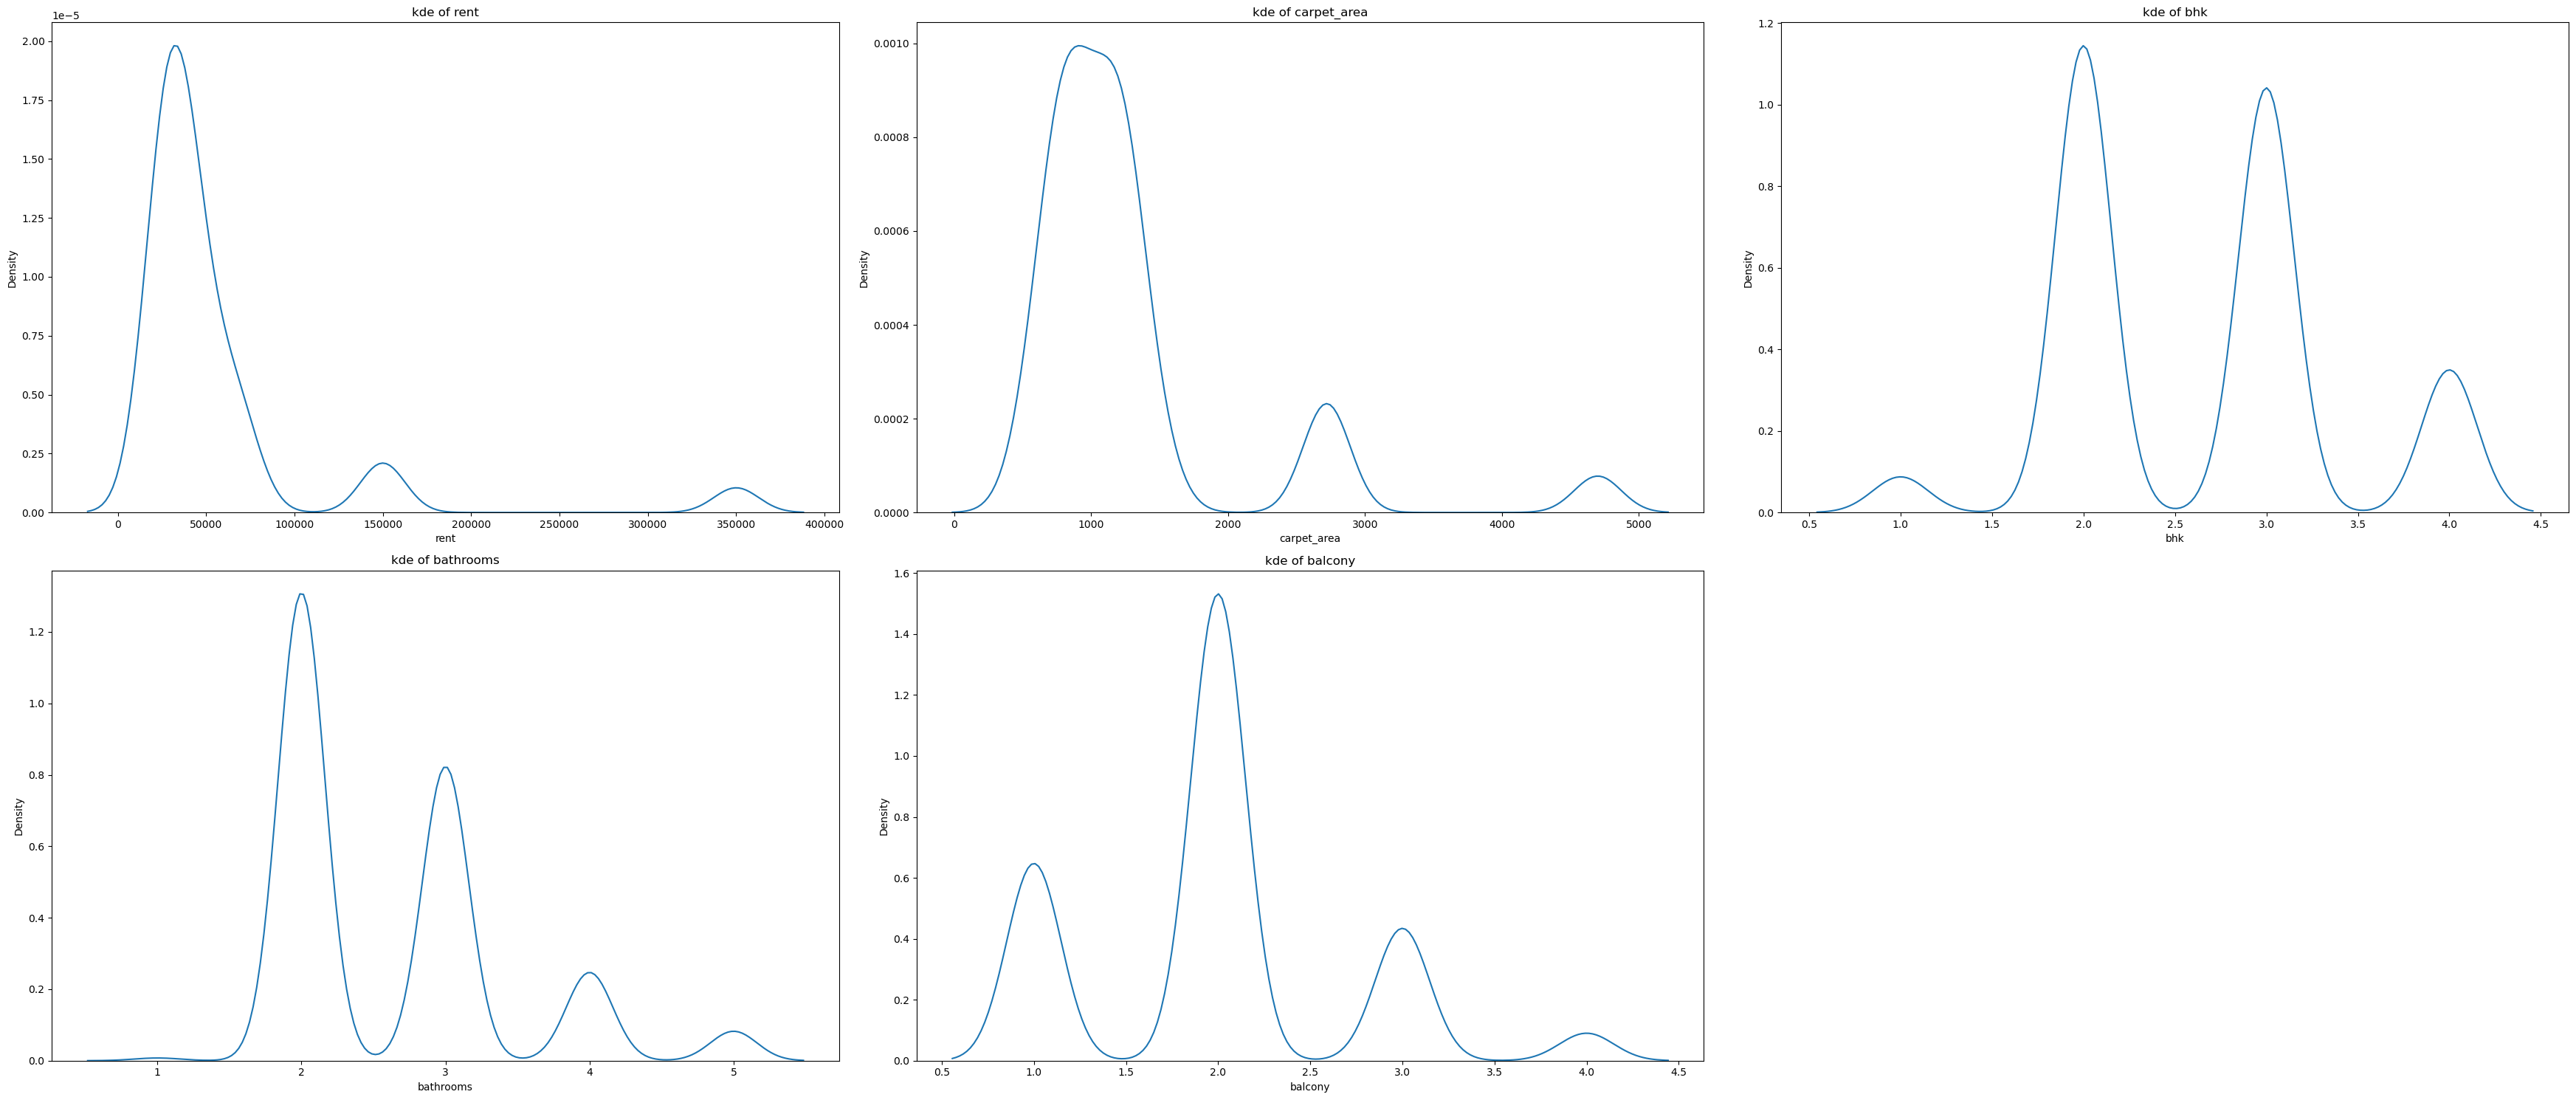

In [21]:
num_cols = ['rent', 'carpet_area', 'bhk', 'bathrooms', 'balcony']

plt.figure(figsize=(35,15))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(x=data[col])
    plt.title(f'kde of {col}')

plt.tight_layout()
plt.show()


## Numerical data

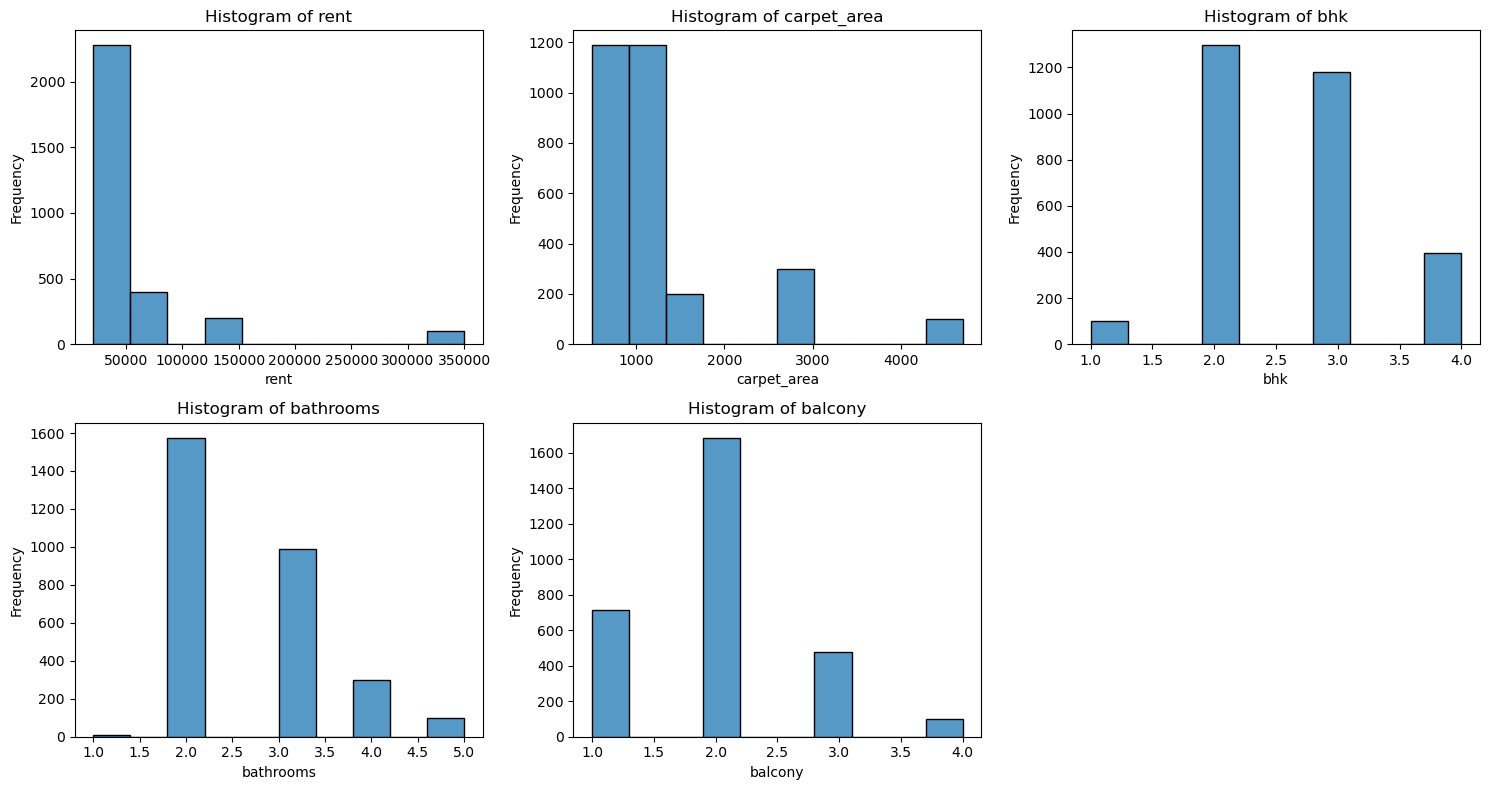

In [22]:
# num_cols = ['rent', 'carpet_area', 'bhk', 'bathrooms', 'balcony']

plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Interpretation(for rent):
The rent distribution is right-skewed, indicating that most properties fall in the mid-range, with a few high-end rentals driving the maximum values.

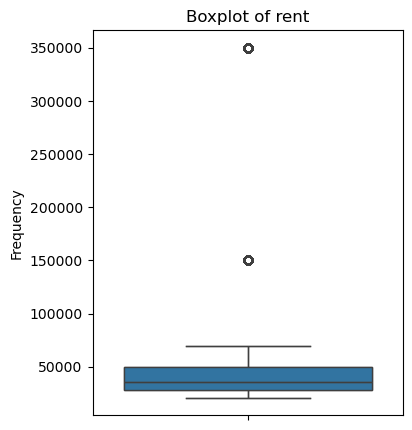

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize = (4,5))
sns.boxplot(data = data['rent'] , color = 'red' )
plt.ylabel('Frequency')
sns.boxplot(y=data['rent'])
plt.title("Boxplot of rent")
plt.show()

plt.tight_layout()


In [24]:
data["rent"].describe()

count      2970.000000
mean      56271.412121
std       62753.924102
min       21000.000000
25%       28000.000000
50%       36000.000000
75%       50000.000000
max      350000.000000
Name: rent, dtype: float64

#### Interpretation:
- The median rent is ₹36,000, which represents the typical rental price in Pune.
- Rent values are right-skewed, indicating a few high-end luxury properties that pull the maximum rent to ₹3.5 lakh.
- The interquartile range (₹28,000 – ₹50,000) shows that most properties fall within the mid-range.
- The boxplot also highlights outliers, which are properties significantly more expensive than the average market rate.

In [25]:
data["carpet_area"].describe()

count    2970.000000
mean     1295.209091
std       847.791902
min       500.000000
25%       800.000000
50%      1060.000000
75%      1270.000000
max      4700.000000
Name: carpet_area, dtype: float64

In [26]:
data["bhk"].describe()

count    2970.000000
mean        2.630303
std         0.752692
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: bhk, dtype: float64

## Categorical data

In [27]:
categorical_cols

['Property_title',
 'furnishing',
 'facing',
 'property_type',
 'locality',
 'availability']

In [28]:
data['floor'].unique()

array([17,  2,  5,  3,  4, 11, 12,  9, 16,  7, 18,  8, 20, 10, 19,  6,  1])

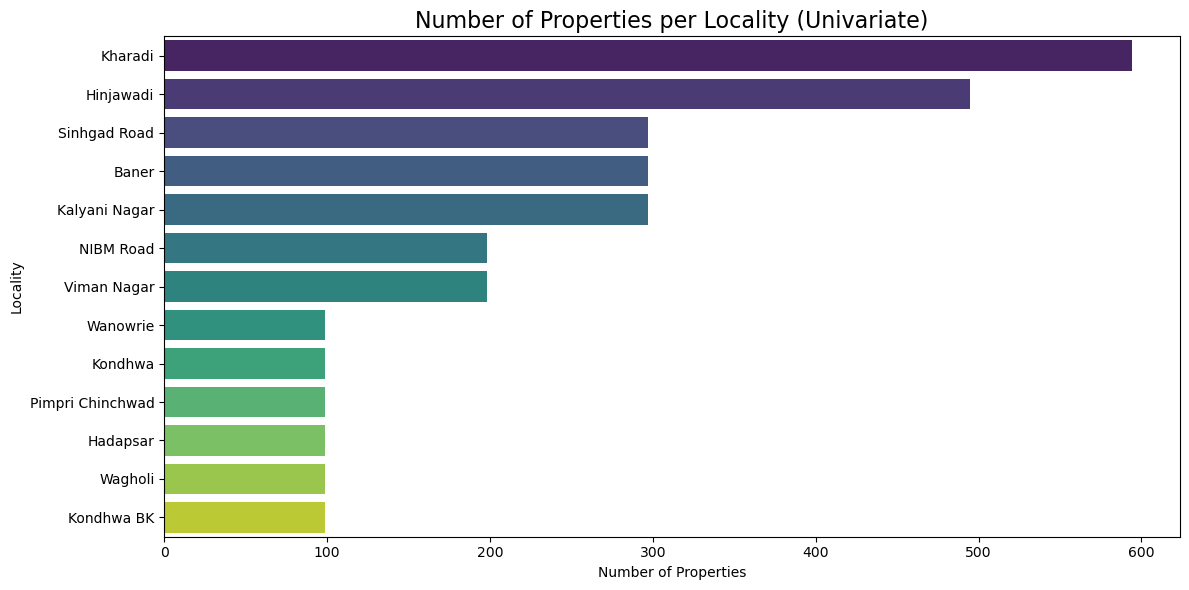

In [29]:
plt.figure(figsize=(12,6))
locality_counts = data['locality'].value_counts()
sns.barplot(x=locality_counts.values, y=locality_counts.index, palette='viridis')
plt.title('Number of Properties per Locality (Univariate)', fontsize=16)
plt.xlabel('Number of Properties')
plt.ylabel('Locality')
plt.tight_layout()
plt.show()

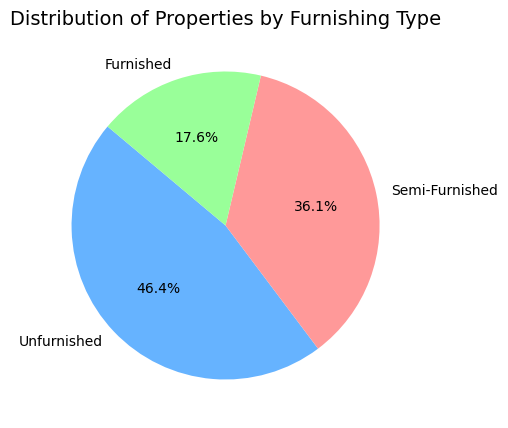

In [30]:
furnishing_counts = data['furnishing'].value_counts()

# Pie chart
plt.figure(figsize=(5,5))
plt.pie(furnishing_counts.values, 
        labels=furnishing_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#66b3ff','#ff9999','#99ff99'],
       ) 
plt.title('Distribution of Properties by Furnishing Type', fontsize=14)
plt.show()

## Bivariate analysis - Exploring Relationships Between Two Variables
- Bivariate analysis helps us understand the relationship between two variables in a dataset. 
- The approach depends on the types of variables involved: numerical or categorical.

### Numerical – Numerical
- Shows how two numbers relate.
- Techniques: Scatter plot, regression plot, 2D histogram, 2D KDE.
- Metric: Correlation coefficient measures strength and direction.

### Numerical – Categorical
- Compares numerical distribution across categories.
- Techniques: Bar plot, boxplot, violin plot.

### Categorical – Categorical
- Shows relationship between two categories.
- Techniques: Cross-tab / contingency table, heatmap, stacked barplot, treemap.

## numerical vs numerical

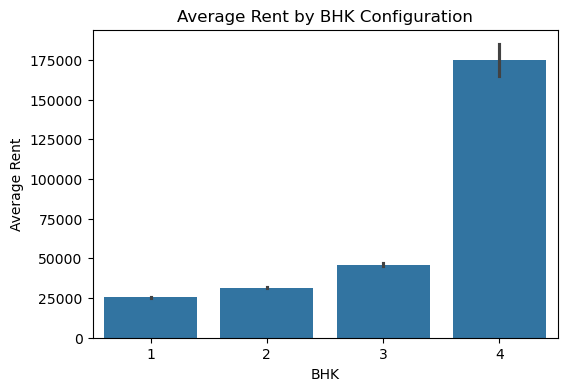

In [31]:
# Numerical vs Numerical Bivariate analysis
plt.figure(figsize=(6,4))
sns.barplot(x='bhk', y='rent', data=data)
plt.title('Average Rent by BHK Configuration')
plt.xlabel('BHK')
plt.ylabel('Average Rent')
plt.show()

#### Interpretation:
Average rent increases significantly with higher BHK configurations, confirming that property size is a major rent determinant.

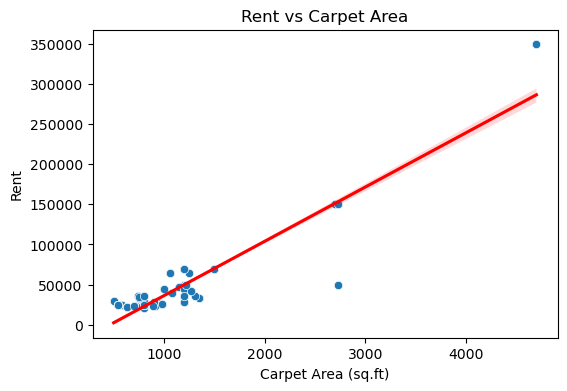

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='carpet_area', y='rent', data=data)
sns.regplot(x='carpet_area', y='rent', data=data, scatter=False, color='red')
plt.title('Rent vs Carpet Area')
plt.xlabel('Carpet Area (sq.ft)')
plt.ylabel('Rent')
plt.show()


#### Interpretation:
Rent shows a strong positive linear relationship with carpet area, indicating that larger properties command higher rental prices.

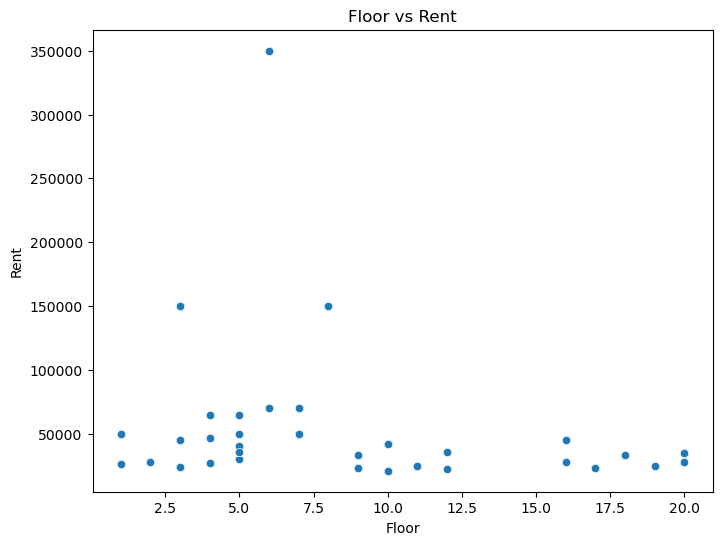

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='floor', y='rent', data=data)
plt.title('Floor vs Rent')
plt.xlabel('Floor')
plt.ylabel('Rent')
plt.show()


                 rent  carpet_area       bhk  bathrooms   balcony
rent         1.000000     0.913148  0.606853   0.650545  0.507544
carpet_area  0.913148     1.000000  0.781008   0.794381  0.539569
bhk          0.606853     0.781008  1.000000   0.896050  0.488146
bathrooms    0.650545     0.794381  0.896050   1.000000  0.516635
balcony      0.507544     0.539569  0.488146   0.516635  1.000000


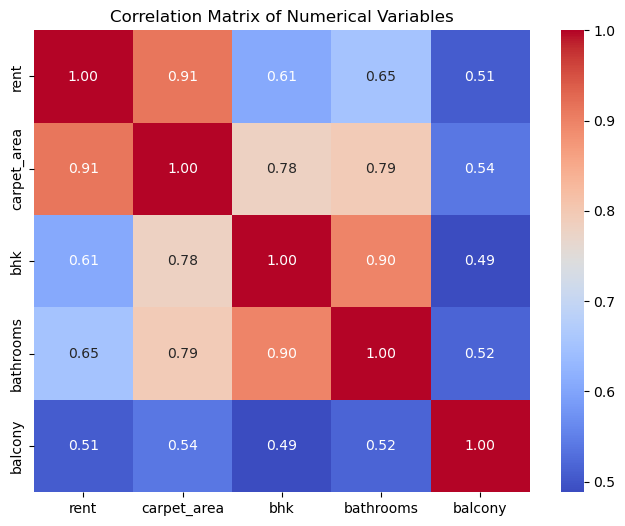

In [34]:
# Correlation matrix
corr_matrix = data[num_cols].corr()
print(corr_matrix)

# Heatmap of correlation
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



#### Interpretation:
Carpet area has the strongest correlation with rent, making it the most influential numerical factor.

## Numerical – Categorical

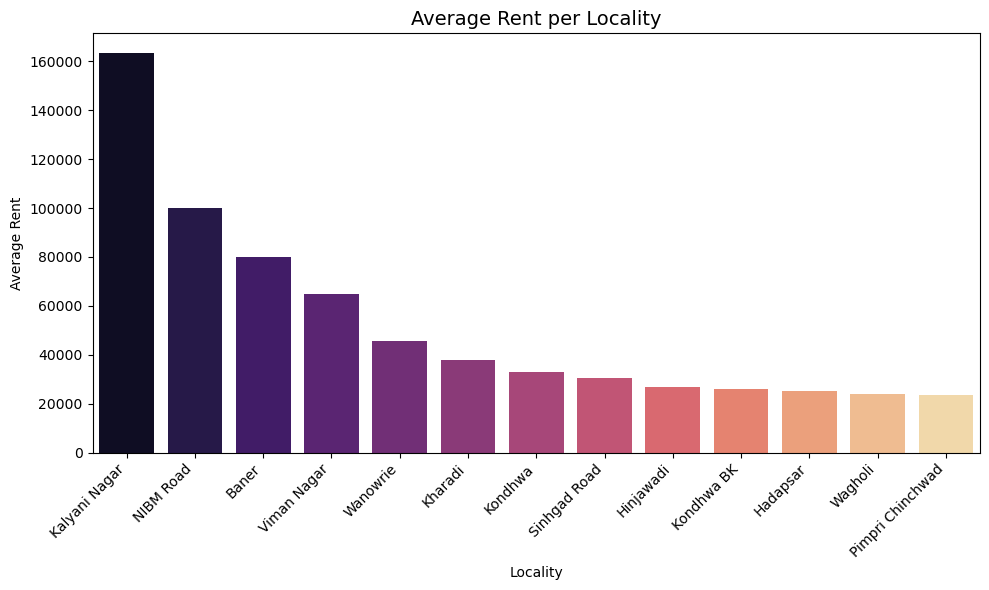

In [35]:
avg_rent_locality = data.groupby('locality')['rent'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rent_locality.index, y=avg_rent_locality.values, palette='magma')
plt.title('Average Rent per Locality', fontsize=14)
plt.xlabel('Locality')
plt.ylabel('Average Rent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


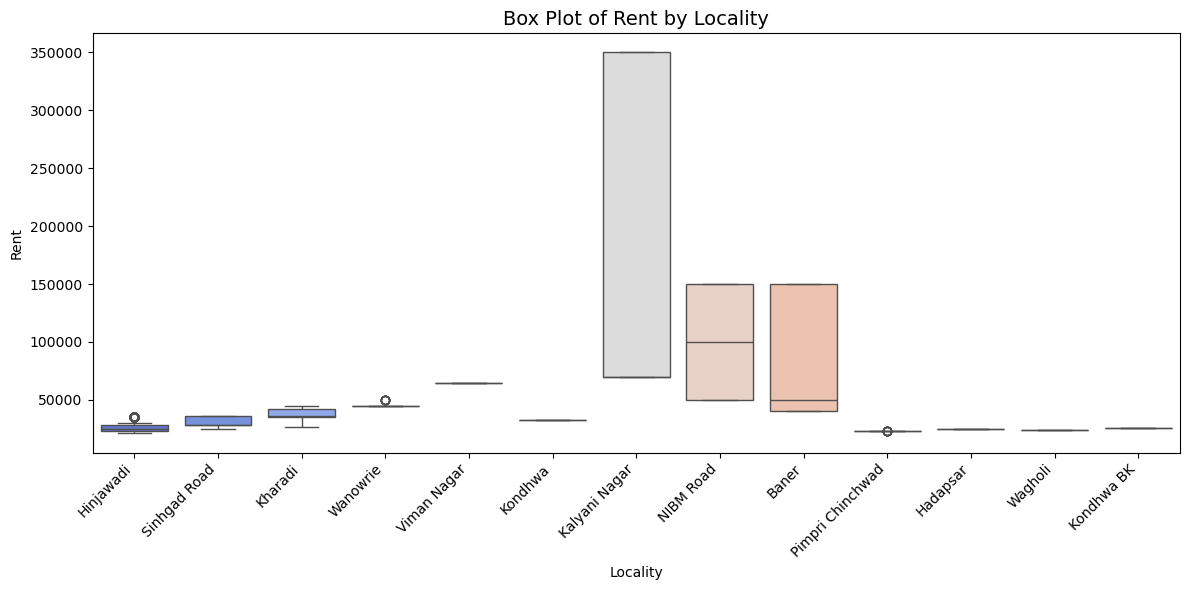

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x='locality', y='rent', data=data, palette='coolwarm')
plt.title('Box Plot of Rent by Locality', fontsize=14)
plt.xlabel('Locality')
plt.ylabel('Rent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


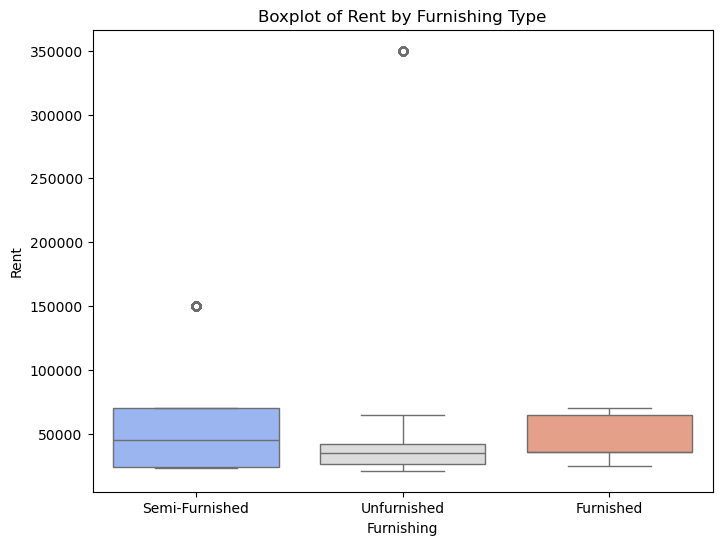

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='furnishing', y='rent', data=data, palette='coolwarm')
plt.title('Boxplot of Rent by Furnishing Type')
plt.xlabel('Furnishing')
plt.ylabel('Rent')
plt.show()


#### Interpretation:
Semi-furnished properties have slightly higher average rent than fully furnished ones, possibly due to larger size or newer construction.

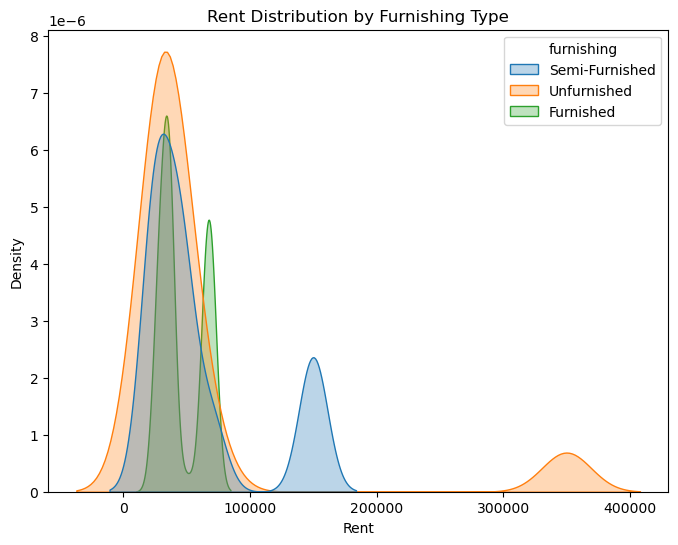

In [38]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=data, x='rent', hue='furnishing', fill=True, alpha=0.3)
plt.title('Rent Distribution by Furnishing Type')
plt.xlabel('Rent')
plt.show()


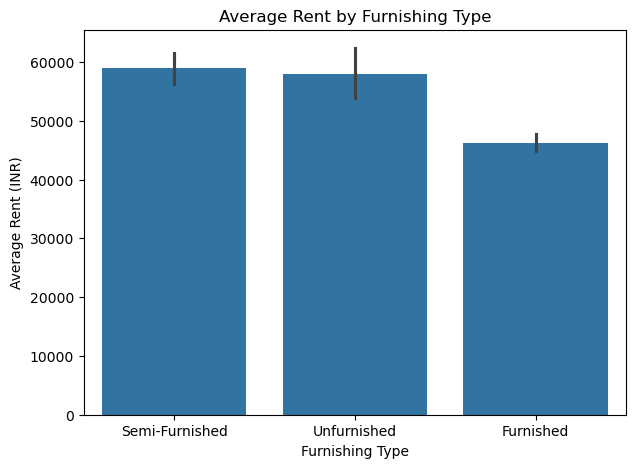

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.barplot(x='furnishing', y='rent', data=data, estimator='mean')

plt.title("Average Rent by Furnishing Type")
plt.xlabel("Furnishing Type")
plt.ylabel("Average Rent (INR)")

plt.show()


## categorical vs categorical

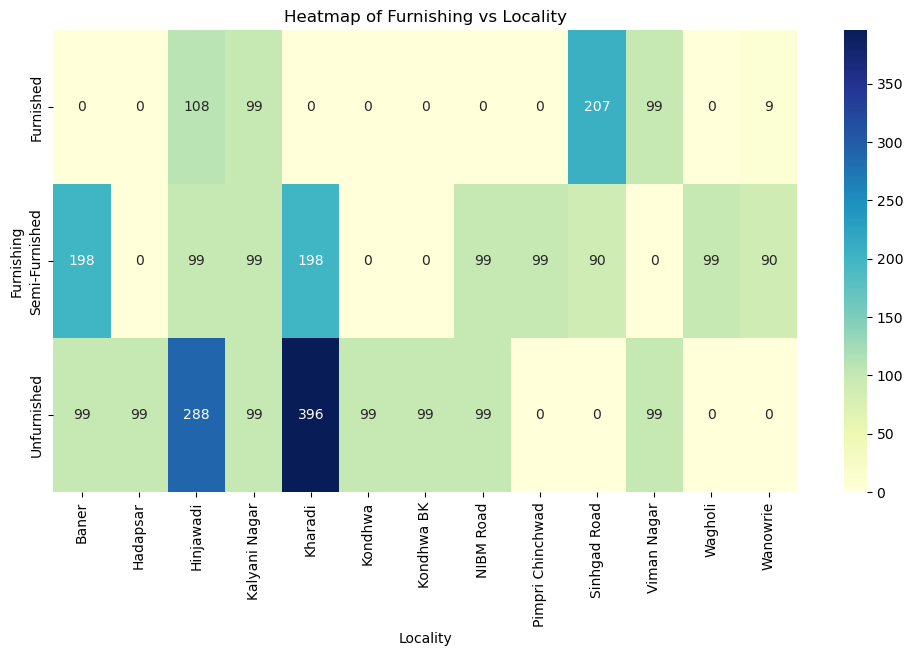

In [40]:
ct = pd.crosstab(data['furnishing'], data['locality'])

plt.figure(figsize=(12,6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Furnishing vs Locality')
plt.xlabel('Locality')
plt.ylabel('Furnishing')
plt.show()


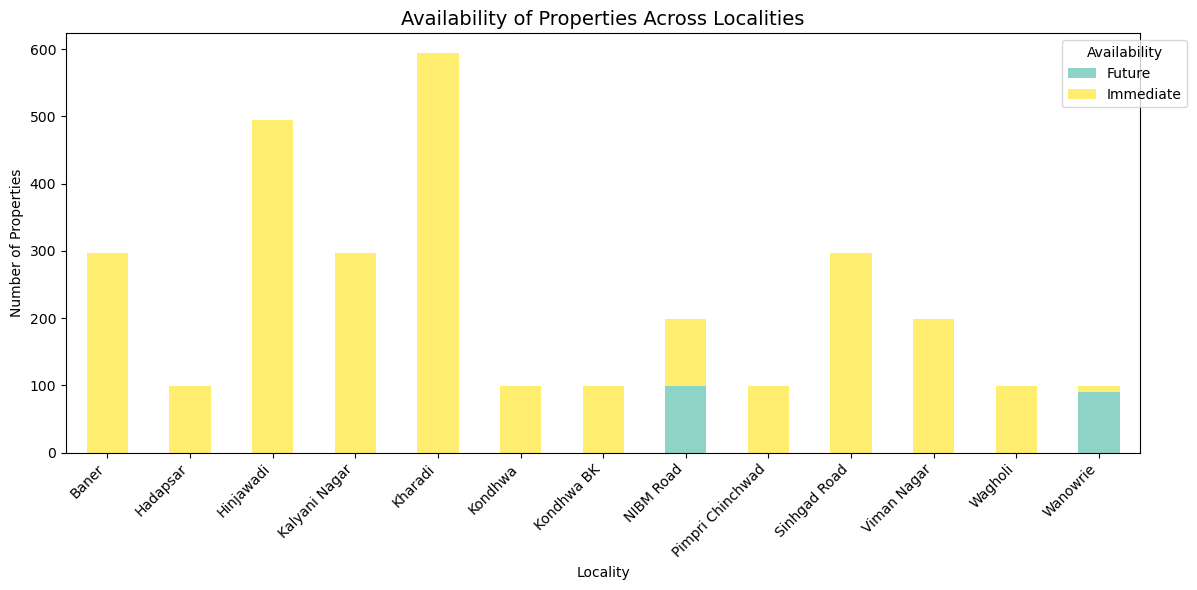

In [41]:
ct = pd.crosstab(data['locality'], data['availability'])

# Plot stacked bar
ct.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.title('Availability of Properties Across Localities', fontsize=14)
plt.xlabel('Locality')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Availability', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

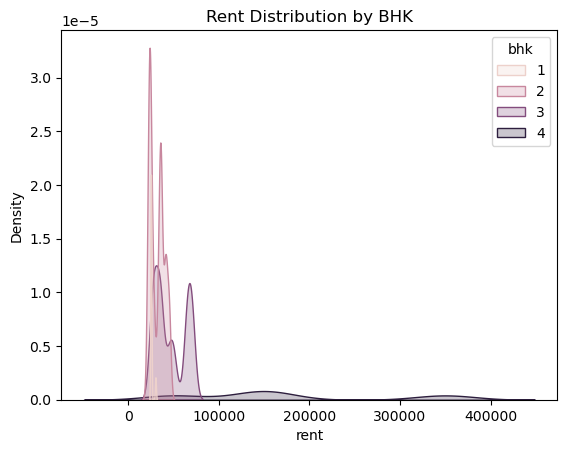

In [42]:
sns.kdeplot(data=data, x='rent', hue='bhk', fill=True)
plt.title('Rent Distribution by BHK')
plt.show()

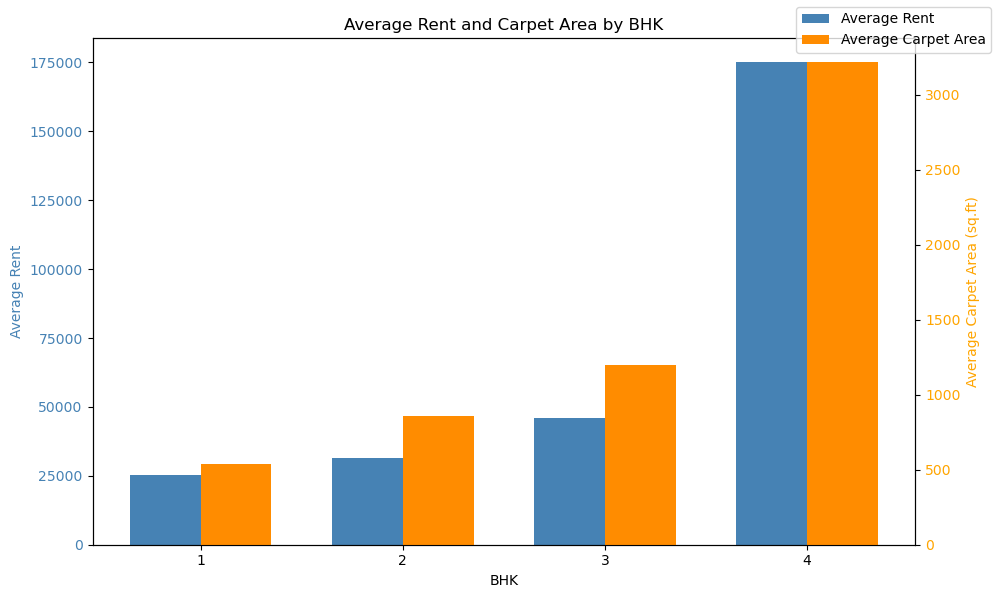

In [43]:
# Group data
grouped = data.groupby('bhk')[['rent', 'carpet_area']].mean().reset_index()

# X-axis setup
bhk = grouped['bhk']
x = np.arange(len(bhk))
width = 0.35

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary axis → Average Rent
bar1 = ax1.bar(x - width/2, grouped['rent'], width, label='Average Rent', color='steelblue') 
ax1.set_ylabel('Average Rent', color='steelblue') 
ax1.tick_params(axis='y', labelcolor='steelblue')

# Secondary axis → Average Carpet Area
ax2 = ax1.twinx() 
bar2 = ax2.bar(x + width/2, grouped['carpet_area'], width, label='Average Carpet Area', color='darkorange') 
ax2.set_ylabel('Average Carpet Area (sq.ft)', color='orange') 
ax2.tick_params(axis='y', labelcolor='orange')

# X-axis (IMPORTANT FIX)
ax1.set_xlabel('BHK')
ax1.set_xticks(x)
ax1.set_xticklabels(bhk)

# Title & Legend
plt.title('Average Rent and Carpet Area by BHK')
fig.legend(loc='upper right')

plt.tight_layout()
plt.show()




#### Interpretation:
As BHK increases, both carpet area and average rent increase proportionally, reinforcing the strong dependency between configuration, size, and rent.

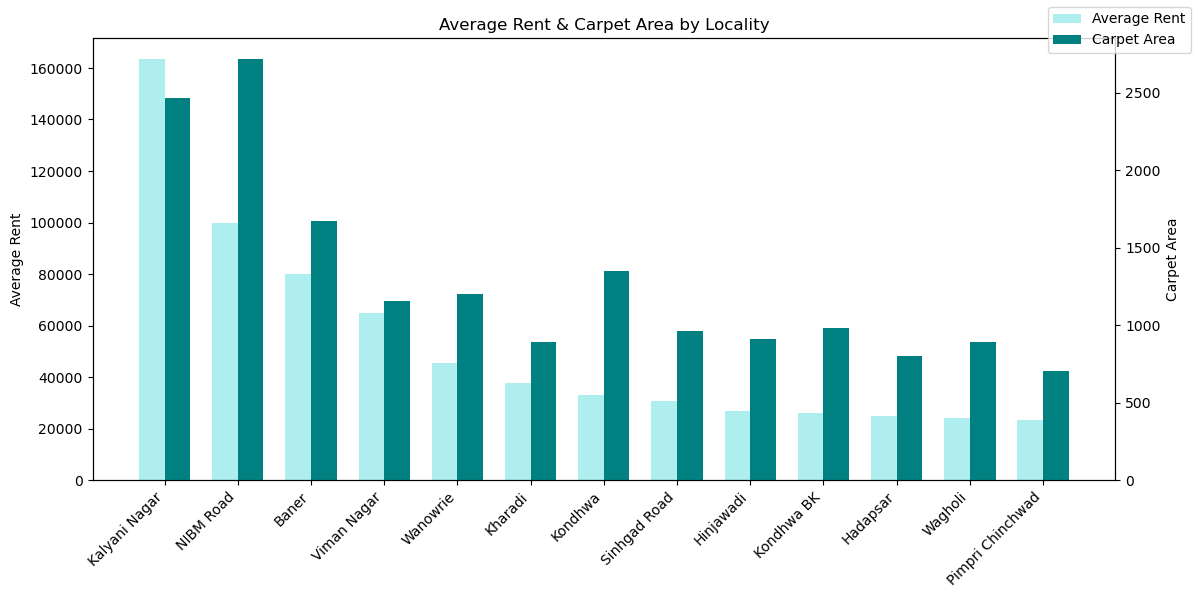

In [44]:
grouped = data.groupby('locality')[['rent', 'carpet_area']].mean().sort_values('rent', ascending=False).reset_index()

x = np.arange(len(grouped))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(x - width/2, grouped['rent'], width, label='Average Rent', color='paleturquoise')
ax1.set_ylabel('Average Rent')

ax2 = ax1.twinx()
ax2.bar(x + width/2, grouped['carpet_area'], width, label='Carpet Area', color='teal')
ax2.set_ylabel('Carpet Area')

ax1.set_xticks(x)
ax1.set_xticklabels(grouped['locality'], rotation=45, ha='right')

plt.title('Average Rent & Carpet Area by Locality')
fig.legend(loc='upper right')

plt.tight_layout()
plt.show()


#### FINAL INFERENCE
The rental market in Pune is primarily driven by property size and configuration. Carpet area has the strongest influence on rent, followed by BHK and number of bathrooms. Location also plays a significant role, with premium localities commanding higher average rents. Furnishing status has a secondary impact, while factors like floor number and facing have limited influence. Overall, rent variation is best explained by a combination of carpet area, BHK configuration, and locality.

In [50]:
data.columns

Index(['Property_title', 'furnishing', 'facing', 'balcony', 'bathrooms', 'bhk',
       'rent', 'property_type', 'locality', 'floor', 'availability',
       'carpet_area'],
      dtype='object')

In [53]:
corr_matrix = data[['facing', 'balcony', 'bathrooms', 'bhk',
       'rent','locality', 'floor', 'availability',
       'carpet_area']].corr()
print(corr_matrix)

# Heatmap of correlation
plt.figure(figsize=(8,6))
sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



ValueError: could not convert string to float: 'East'